In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from qiskit_aer import StatevectorSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Download data
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')
prices = data['Close'].values
dates = data.index

In [ ]:
# Preprocess data: Use the closing prices and generate some simple moving averages as features
data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

In [ ]:
# Features and labels
X = data[['Close', 'SMA_5', 'SMA_10']].values
y = data['Close'].shift(-1).values[:-1]  # Next day's price
X = X[:-1]  # Remove the last element to match the label size

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

[*********************100%%**********************]  1 of 1 completed


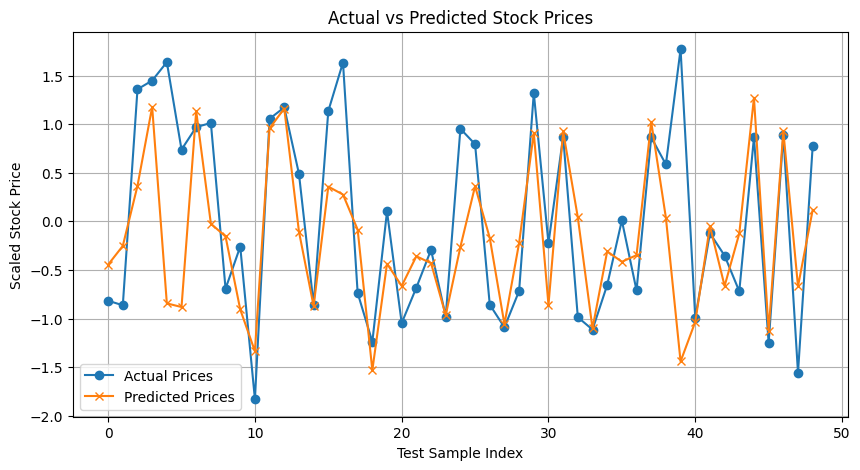

In [ ]:
# Quantum machine learning setup
backend = StatevectorSimulator()
feature_map = ZZFeatureMap(feature_dimension=3, reps=2, entanglement='full')
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)
qsvr = QSVR(quantum_kernel=quantum_kernel)
qsvr.fit(X_train, y_train)

# Prediction using the QSVR model
y_pred = qsvr.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
score = qsvr.score(X_test, y_test)
print("Accuracy of QSVR model:", score)

Accuracy of QSVR model: 0.3105752627123992


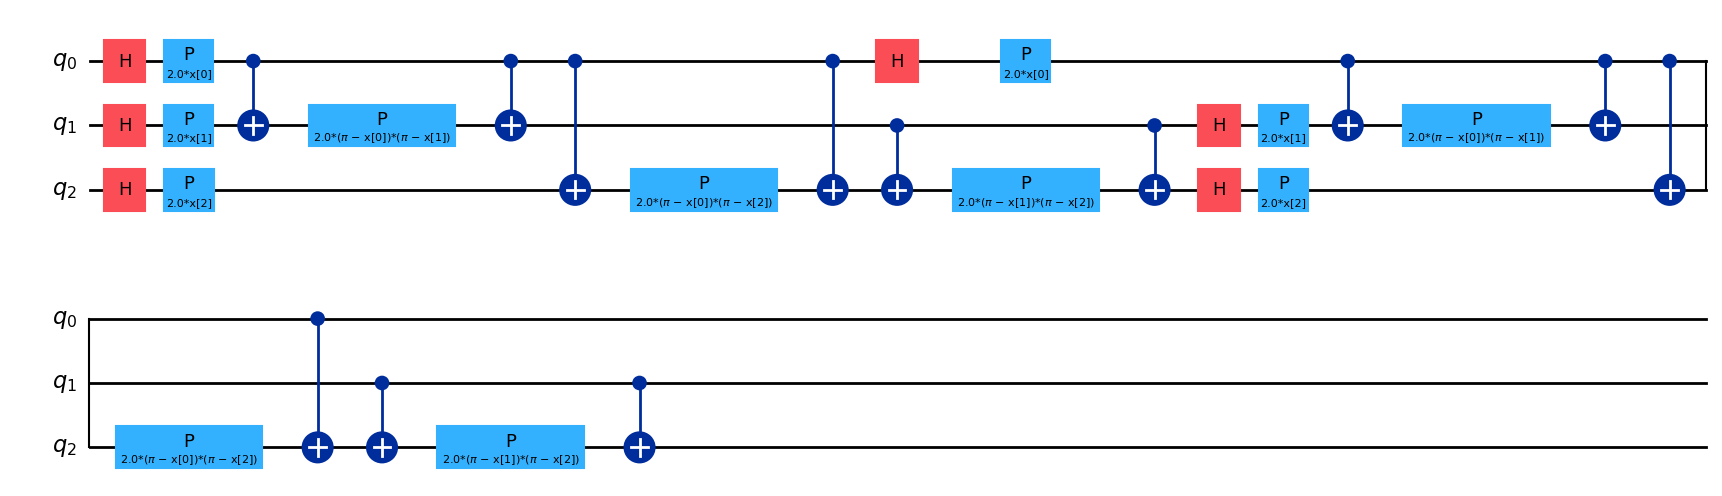

In [ ]:
feature_map.decompose().draw('mpl')